In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter

In [2]:
# Load the dataset
file_path = r"C:\Users\HP\Desktop\week 1\raw_analyst_ratings.csv"
news_df = pd.read_csv(file_path)



In [3]:
# Ensure Date column is in datetime format
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
news_df = news_df.dropna(subset=['Date'])


In [4]:
# Descriptive Statistics
news_df['headline_length'] = news_df['headline'].apply(lambda x: len(str(x).split()))



In [5]:
print(news_df['headline_length'].describe())  # Headline length stats



count    1.007112e+06
mean     1.134743e+01
std      6.163940e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.000000e+01
Name: headline_length, dtype: float64


In [6]:
print(news_df['publisher'].value_counts().head())  # Articles per publisher



publisher
Paul Quintaro        165400
Lisa Levin           130376
Benzinga Newsdesk    100108
Charles Gross         71540
Monica Gerson         60934
Name: count, dtype: int64


In [7]:
print(news_df['Date'].dt.date.value_counts().sort_index().head())  # Publication trends

Date
2009-02-14    1
2009-04-27    1
2009-04-29    1
2009-05-22    1
2009-05-27    5
Name: count, dtype: int64


In [8]:
# Sentiment Analysis
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment
neutral     527564
positive    319380
negative    160168
Name: count, dtype: int64


In [17]:
sid = SentimentIntensityAnalyzer()


In [18]:
news_df['sentiment_score'] = news_df['headline'].apply(lambda x: sid.polarity_scores(str(x))['compound'])


In [19]:
news_df['sentiment'] = news_df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [20]:
print(news_df['sentiment'].value_counts())  # Sentiment distribution

sentiment
neutral     527564
positive    319380
negative    160168
Name: count, dtype: int64


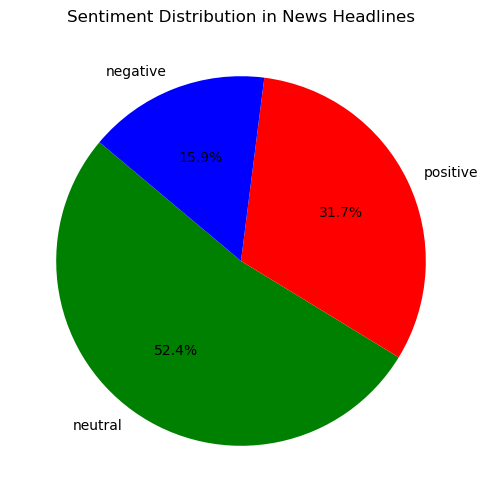

In [21]:


# Count the occurrences of each sentiment
sentiment_counts = news_df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'], startangle=140)
plt.title('Sentiment Distribution in News Headlines')
plt.show()


In [9]:
# Common Keywords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stop_words = set(stopwords.words('english'))
news_df['headline_tokens'] = news_df['headline'].apply(lambda x: word_tokenize(str(x).lower()))
news_df['filtered_tokens'] = news_df['headline_tokens'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])

In [11]:
all_words = [word for tokens in news_df['filtered_tokens'] for word in tokens]
print(Counter(all_words).most_common(20))  # Most common keywords

[('stocks', 110989), ('vs', 100960), ('eps', 91754), ('est', 89056), ('shares', 79062), ('reports', 78376), ('update', 65380), ('earnings', 64048), ('market', 63597), ('top', 57176), ('sales', 54298), ('pt', 54114), ('benzinga', 51834), ('announces', 48233), ('buy', 46573), ('downgrades', 44480), ('raises', 41745), ('price', 41628), ('upgrades', 41296), ('trading', 40500)]


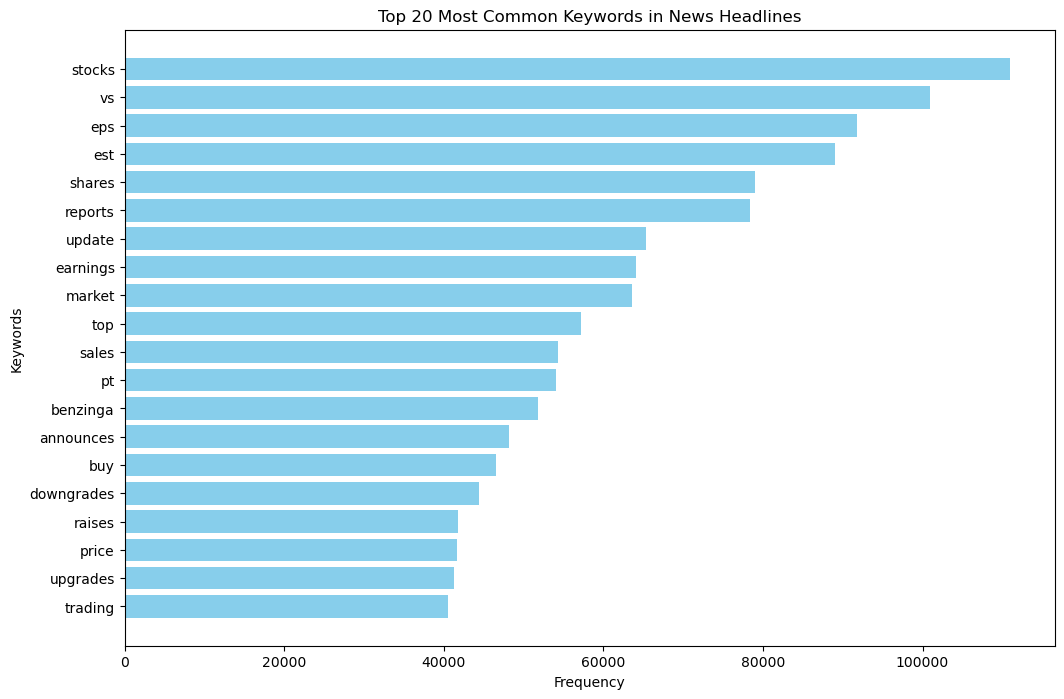

In [22]:
# Separate the words and their frequencies for plotting
words, frequencies = zip(*common_words)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top 20 Most Common Keywords in News Headlines')
plt.gca().invert_yaxis()  # To display the most frequent word at the top
plt.show()


In [15]:
# Time Series Analysis
print(news_df.set_index('Date').resample('D').size().head())  # Publication trends over time

Date
2009-02-14    1
2009-02-15    0
2009-02-16    0
2009-02-17    0
2009-02-18    0
Freq: D, dtype: int64


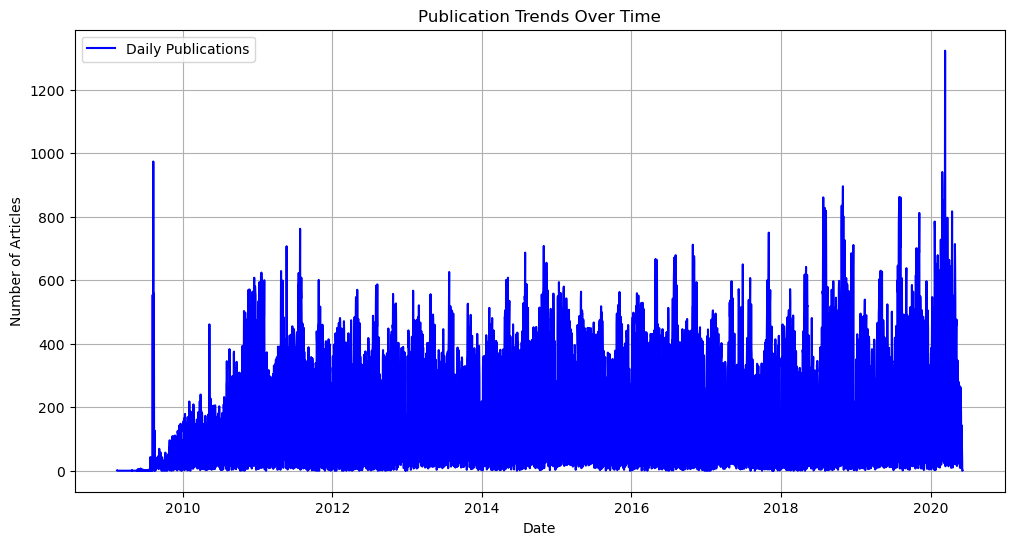

In [23]:

# Resample the data by day and count the number of articles per day
daily_publications = news_df.set_index('Date').resample('D').size()

# Create a trend line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_publications.index, daily_publications.values, label='Daily Publications', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Publisher Analysis
print(news_df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in str(x) else x).value_counts().head())  # Unique domains

publisher
Paul Quintaro        165400
Lisa Levin           130376
Benzinga Newsdesk    100108
Charles Gross         71540
Monica Gerson         60934
Name: count, dtype: int64


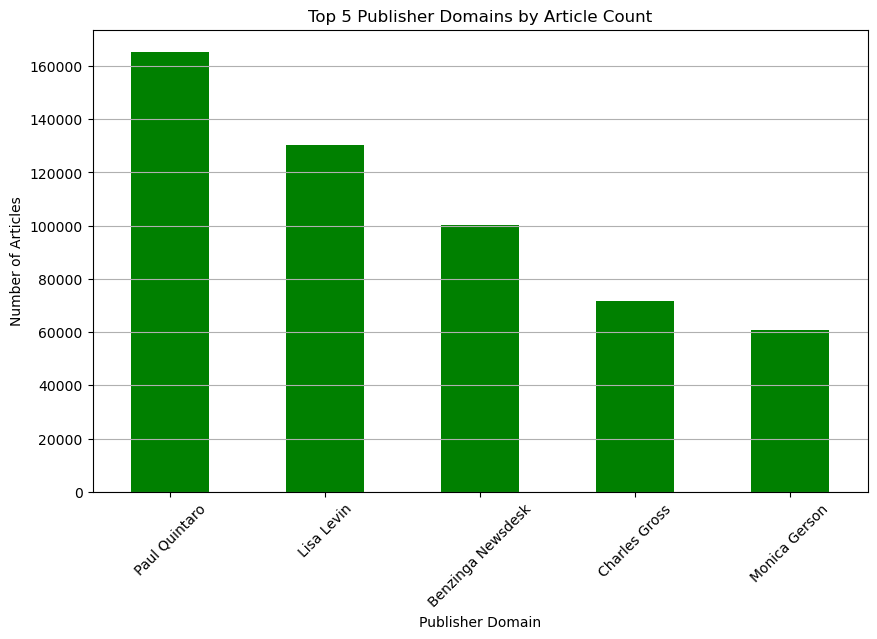

In [25]:
# Create a bar chart
plt.figure(figsize=(10, 6))
domain_counts.plot(kind='bar', color='green')
plt.xlabel('Publisher Domain')
plt.ylabel('Number of Articles')
plt.title('Top 5 Publisher Domains by Article Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
